In [1]:
from rich.console import Console
from rich.table import Table

def let_freq(dct):
    table = Table(title="корпус")
    table.add_column("буква", justify="right", style="cyan", no_wrap=True)
    table.add_column("частота", justify="right", style="cyan", no_wrap=True)
    letters = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1], reverse=True)}
    for k, v in letters.items():
        table.add_row(f'{k}', f'{v}')
    console = Console()
    console.print(table)

def let_freq_pers(dct):
    table = Table(title="корпус проценты")
    table.add_column("буква", justify="right", style="cyan", no_wrap=True)
    table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
    dct_pers = {}
    for k, v in dct.items():
        dct_pers[k] = round(v / sum([v for v in dct.values()]) * 100, 2)
    dct_pers = {k: v for k, v in sorted(dct_pers.items(), key=lambda item: item[1], reverse=True)}

    for k, v in dct_pers.items():
        table.add_row(f'{k}', f'{v}')
    console = Console()
    console.print(table)

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
def plot(dct):
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1], reverse=True)}
    x = [i for i in dct.keys()]
    y = [i for i in dct.values()]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_yticks([y[0], y[1], y[3], y[7], y[15], y[22], y[len(y)-1]])
    ax.yaxis.set_minor_locator(MultipleLocator(10000))
    plt.grid(True, color = "grey", linewidth = "0.8", linestyle = '--')
    plt.show()

In [3]:
def tsipf(dct):
    ind = {}
    k = 1
    for v in dct.values():
        ind[k] = round(max([i for i in dct.values()]) / v, 1)
        k+=1

    table = Table(title="индекс Ципфа")
    table.add_column("ранг", justify="right", style="cyan", no_wrap=True)
    table.add_column("индекс", justify="right", style="cyan", no_wrap=True)
    for k, v in ind.items():
        table.add_row(f'{k}', f'{v}')
    console = Console()
    console.print(table)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def plot_ind(dct):
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1], reverse=True)}
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_figheight(7)
    fig.set_figwidth(10)
    x = [str(i) for i in dct.keys()]
    y = [i for i in dct.values()]
    x_grid = x
    y_grid = [round(max([i for i in dct.values()]) / i, 1) for i in range(1, len(dct.keys())+1)]
    ax.plot(x, y, marker='o', markersize = 3)
    ax.plot(x_grid, y_grid, marker='o', markersize = 3)
    blue_patch = mpatches.Patch(color='blue', label='фактическая частота буквы')
    orange_patch = mpatches.Patch(color='orange', label='максимальная по частотности буква / ранг')
    ax.legend(handles=[blue_patch, orange_patch])
    ax.set_yticks([y_grid[0], y_grid[1], y_grid[2], y_grid[7], y_grid[15], y_grid[len(y_grid)-1]])
    plt.grid(True, color = "grey", linewidth = "0.8", linestyle = '--')
    plt.show()

Здесь мы подсчитали абсолютное количество букв в корпусе и проконтролировали количество слов (2 миллиона). Тексты взяты из ГИКРЯ, сбалансированы из 4 подкорпусов (Новости, Вконтакте, Живой Журнал и Журнальный Зал).

In [15]:
from bs4 import BeautifulSoup
import string, os, re
letters = {}
letset = ['ё', 'й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ', 'э', 'ж', 'д', 'л', 'о', 'р', 'п', 'а', 'в', 'ы', 'ф', 'я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю']
wordcount = 0
for f in os.listdir(r"C:\Users\lizao\Desktop\smth\гикря"):
    with open(os.path.join(r"C:\Users\lizao\Desktop\smth\гикря", f), 'r', encoding = 'utf-8') as file:
        raw = file.read()
    soup = BeautifulSoup(raw)
      
    for p in soup.find_all('text'):
        words = re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]+)?', p.text)
        wordcount += len(words)
        if wordcount >= 2e6:
            break
        else:
            for word in words:
                    for char in word:
                        if char.lower() in letset:
                            if char.lower() in letters:
                                letters[char.lower()] +=1
                            else:
                                letters[char.lower()] = 1


In [20]:
from rich.console import Console
from rich.table import Table

table = Table(title="корпус")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота", justify="right", style="cyan", no_wrap=True)
letters = {k: v for k, v in sorted(letters.items(), key=lambda item: item[1], reverse=True)}
for k, v in letters.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     о │ 1139224 │
│     е │  893188 │
│     а │  849519 │
│     т │  719036 │
│     и │  712462 │
│     н │  686425 │
│     с │  543568 │
│     р │  451965 │
│     в │  433939 │
│     л │  417756 │
│     к │  363288 │
│     м │  344759 │
│     д │  309652 │
│     п │  293783 │
│     у │  287491 │
│     я │  218049 │
│     ь │  208050 │
│     ы │  187322 │
│     б │  178761 │
│     ч │  169892 │
│     з │  163136 │
│     г │  159361 │
│     й │  114294 │
│     ж │  113098 │
│     х │   93684 │
│     ш │   79452 │
│     ю │   78424 │
│     э │   43560 │
│     ц │   40624 │
│     щ │   38502 │
│     ф │   29299 │
│     ъ │    2934 │
└───────┴─────────┘

График частотности букв по русскому корпусу (абсолютные частоты):

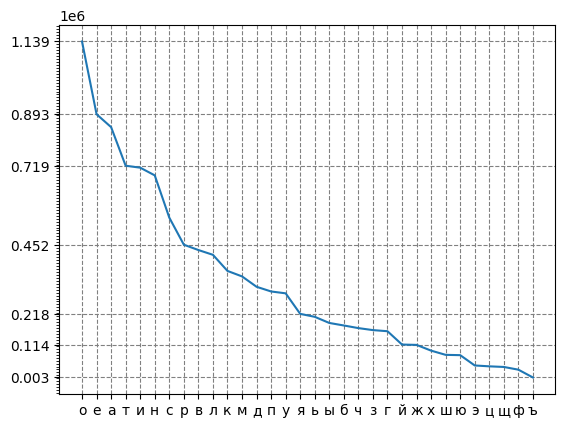

In [19]:
plot(letters)

Подсчет индекса Ципфа:

* индекс считается как отношение самой частотной буквы к букве с соответсвуюющим рангом
* чем больше индекс, тем реже встречается буква

In [110]:
tsipf(letters)

  индекс Ципфа   
┏━━━━━━┳━━━━━━━━┓
┃ ранг ┃ индекс ┃
┡━━━━━━╇━━━━━━━━┩
│    1 │    1.0 │
│    2 │    1.1 │
│    3 │    1.3 │
│    4 │    1.5 │
│    5 │    1.9 │
│    6 │    2.3 │
│    7 │    2.7 │
│    8 │    3.1 │
│    9 │    3.4 │
│   10 │    3.5 │
│   11 │    3.5 │
│   12 │    4.0 │
│   13 │    4.0 │
│   14 │    4.2 │
│   15 │    4.6 │
│   16 │    5.2 │
│   17 │    5.2 │
│   18 │    6.8 │
│   19 │    8.1 │
│   20 │   10.2 │
│   21 │   11.0 │
│   22 │   13.9 │
│   23 │   15.0 │
│   24 │   22.3 │
│   25 │   22.7 │
│   26 │   22.8 │
│   27 │   23.3 │
│   28 │   23.9 │
│   29 │   25.3 │
│   30 │   32.1 │
│   31 │   44.5 │
│   32 │  460.1 │
└──────┴────────┘

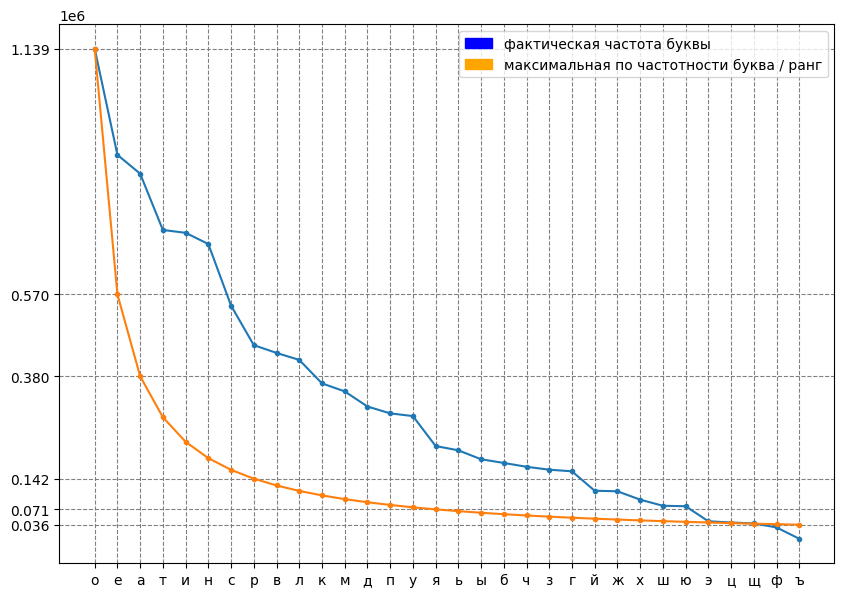

In [17]:
plot_ind(letters)

Подсчет относительных частот букв в корпусе.
* здесь и далее округление до сотых

In [3]:
vols = 'ёуеыаоэяию'
cons = 'йцкнгшщзхфвпрлджчсмтб'
etc = 'ьъ'

table = Table(title="корпус проценты")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
letters_pers = {}
for k, v in letters.items():
    letters_pers[k] = round(v / sum([v for v in letters.values()]) * 100, 2)
letters_pers = {k: v for k, v in sorted(letters_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in letters_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 12.29 │
│     о │                 11.65 │
│     к │                   9.4 │
│     а │                  8.17 │
│     е │                  6.42 │
│     н │                  5.36 │
│     и │                  4.55 │
│     с │                  3.93 │
│     п │                  3.61 │
│     р │                  3.48 │
│     м │                  3.47 │
│     ч │                  3.09 │
│     в │                  3.07 │
│     д │                  2.89 │
│     л │                  2.67 │
│     г │                  2.37 │
│     у │                  2.36 │
│     з │                  1.82 │
│     б │                  1.52 │
│     ь │                   1.2 │
│     й │                  1.12 │
│     я │                  0.89 │
│     х │                  0.82 │
│     ы │                  0.55 │
│     ф │                  0.54 │
│     ц │                  0.54 │
│     ж │                  0.53 │
│     ш │                  0.51 │
│     ю │                  0.48 │
│     э │                  0.38 │
│     щ │                  0.28 │
│     ъ │                  0.03 │
└───────┴───────────────────────┘

Подсчет относительных частот согласных отдельно.

In [4]:
abs_vols = {k: v for k, v in sorted(letters.items(), key=lambda item: item[1], reverse=True) if k in vols}
abs_cons = {k: v for k, v in sorted(letters.items(), key=lambda item: item[1], reverse=True) if k in cons}
dct_cons = {}
dct_vols = {}
for k, v in abs_cons.items():
    dct_cons[k] = round(v / sum([v for v in abs_cons.values()]) * 100, 2) 
for k, v in abs_vols.items():
    dct_vols[k] = round(v / sum([v for v in abs_vols.values()]) * 100, 2) 

table = Table(title="относительные частоты согласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_cons_pers = {}
for k, v in dct_cons.items():
    dct_cons_pers[k] = round(v / sum([v for v in dct_cons.values()]) * 100, 2)
dct_cons_pers = {k: v for k, v in sorted(dct_cons_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_cons_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

 относительные частоты согласных 
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 19.42 │
│     к │                 14.86 │
│     н │                  8.46 │
│     с │                  6.21 │
│     п │                   5.7 │
│     р │                   5.5 │
│     м │                  5.47 │
│     ч │                  4.88 │
│     в │                  4.85 │
│     д │                  4.57 │
│     л │                  4.21 │
│     г │                  3.74 │
│     з │                  2.87 │
│     б │                  2.41 │
│     й │                  1.77 │
│     х │                  1.29 │
│     ф │                  0.86 │
│     ц │                  0.85 │
│     ж │                  0.83 │
│     ш │                  0.81 │
│     щ │                  0.44 │
└───────┴───────────────────────┘

Подчет относительных частот гласных отдельно

In [5]:
table = Table(title="относительные частоты гласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_vols_pers = {}
for k, v in dct_vols.items():
    dct_vols_pers[k] = round(v / sum([v for v in dct_vols.values()]) * 100, 2)
dct_vols_pers = {k: v for k, v in sorted(dct_vols_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_vols_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

  относительные частоты гласных  
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     о │                 32.85 │
│     а │                 23.05 │
│     е │                  18.1 │
│     и │                 12.84 │
│     у │                  6.66 │
│     я │                   2.5 │
│     ы │                  1.56 │
│     ю │                  1.37 │
│     э │                  1.08 │
└───────┴───────────────────────┘

Подсчет абсолютных частот букв в фанфике. (количество слов - 148350)

In [6]:
from bs4 import BeautifulSoup
import string, os, re
letters2 = {}
letset = ['ё', 'й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ', 'э', 'ж', 'д', 'л', 'о', 'р', 'п', 'а', 'в', 'ы', 'ф', 'я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю']
wordcount2 = 0

with open(r"C:\Users\lizao\Downloads\Telegram Desktop\Kto-vy-professor-Ambridz (1).txt", 'r', encoding = 'utf-8') as file:
    raw = file.read()
      
words2 = re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]?)', raw)
wordcount2 += len(words2)
for word in words2:
        for char in word:
            if char.lower() in letset:
                if char.lower() in letters2:
                    letters2[char.lower()] +=1
                else:
                    letters2[char.lower()] = 1

table = Table(title="фанфик")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота", justify="right", style="cyan", no_wrap=True)
letters2 = {k: v for k, v in sorted(letters2.items(), key=lambda item: item[1], reverse=True)}
for k, v in letters2.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

      фанфик       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     т │    1420 │
│     о │    1018 │
│     к │     997 │
│     а │     706 │
│     е │     681 │
│     н │     394 │
│     ч │     377 │
│     и │     349 │
│     м │     340 │
│     с │     312 │
│     д │     305 │
│     в │     276 │
│     г │     232 │
│     п │     223 │
│     р │     217 │
│     л │     214 │
│     б │     213 │
│     у │     165 │
│     з │     144 │
│     ь │      90 │
│     й │      88 │
│     я │      64 │
│     х │      57 │
│     ш │      49 │
│     ы │      45 │
│     э │      28 │
│     ю │      23 │
│     щ │      22 │
│     ц │      20 │
│     ж │      16 │
│     ф │       7 │
│     ъ │       1 │
└───────┴─────────┘

In [ ]:
plot(letters2)

Подсчет относительных частот букв в фанфике.

In [7]:
table = Table(title="фанфик проценты")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
letters2_pers = {}
for k, v in letters2.items():
    letters2_pers[k] = round(v / sum([v for v in letters2.values()]) * 100, 2)
letters2_pers = {k: v for k, v in sorted(letters2_pers.items(), key=lambda item: item[1], reverse=True)}

for k, v in letters2_pers.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

         фанфик проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 15.62 │
│     о │                  11.2 │
│     к │                 10.96 │
│     а │                  7.76 │
│     е │                  7.49 │
│     н │                  4.33 │
│     ч │                  4.15 │
│     и │                  3.84 │
│     м │                  3.74 │
│     с │                  3.43 │
│     д │                  3.35 │
│     в │                  3.04 │
│     г │                  2.55 │
│     п │                  2.45 │
│     р │                  2.39 │
│     л │                  2.35 │
│     б │                  2.34 │
│     у │                  1.81 │
│     з │                  1.58 │
│     ь │                  0.99 │
│     й │                  0.97 │
│     я │                   0.7 │
│     х │                  0.63 │
│     ш │                  0.54 │
│     ы │                  0.49 │
│     э │                  0.31 │
│     ю │                  0.25 │
│     щ │                  0.24 │
│     ц │                  0.22 │
│     ж │                  0.18 │
│     ф │                  0.08 │
│     ъ │                  0.01 │
└───────┴───────────────────────┘

Подсчет относительных частот гласных отдельно в фанфике.

In [8]:
vols = 'ёуеыаоэяию'
cons = 'йцкнгшщзхфвпрлджчсмтб'
etc = 'ьъ'

abs_vols2 = {k: v for k, v in sorted(letters2.items(), key=lambda item: item[1], reverse=True) if k in vols}
abs_cons2 = {k: v for k, v in sorted(letters2.items(), key=lambda item: item[1], reverse=True) if k in cons}
dct_vols2 = {}
dct_cons2 = {}

for k, v in abs_cons2.items():
    dct_cons2[k] = v / sum([v for v in abs_cons2.values()]) * 100

for k, v in abs_vols2.items():
    dct_vols2[k] = v / sum([v for v in abs_vols2.values()]) * 100

table = Table(title="относительные частоты гласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_vols_pers2 = {}
for k, v in dct_vols2.items():
    dct_vols_pers2[k] = round(v / sum([v for v in dct_vols2.values()]) * 100, 2)
dct_vols_pers2 = {k: v for k, v in sorted(dct_vols_pers2.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_vols_pers2.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

  относительные частоты гласных  
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     о │                 33.06 │
│     а │                 22.93 │
│     е │                 22.12 │
│     и │                 11.33 │
│     у │                  5.36 │
│     я │                  2.08 │
│     ы │                  1.46 │
│     э │                  0.91 │
│     ю │                  0.75 │
└───────┴───────────────────────┘

Подсчет относительных частот согласных отдельно в фанфике.

In [9]:
table = Table(title="относительные частоты согласных")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("частота (в процентах)", justify="right", style="cyan", no_wrap=True)
dct_cons_pers2 = {}
for k, v in dct_cons2.items():
    dct_cons_pers2[k] = round(v / sum([v for v in dct_cons2.values()]) * 100, 2)
dct_cons_pers2 = {k: v for k, v in sorted(dct_cons_pers2.items(), key=lambda item: item[1], reverse=True)}

for k, v in dct_cons_pers2.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

 относительные частоты согласных 
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     т │                 23.97 │
│     к │                 16.83 │
│     н │                  6.65 │
│     ч │                  6.37 │
│     м │                  5.74 │
│     с │                  5.27 │
│     д │                  5.15 │
│     в │                  4.66 │
│     г │                  3.92 │
│     п │                  3.76 │
│     р │                  3.66 │
│     л │                  3.61 │
│     б │                   3.6 │
│     з │                  2.43 │
│     й │                  1.49 │
│     х │                  0.96 │
│     ш │                  0.83 │
│     щ │                  0.37 │
│     ц │                  0.34 │
│     ж │                  0.27 │
│     ф │                  0.12 │
└───────┴───────────────────────┘

Сравнение относительных частот букв в корпусе и фанфике. За основу берется значение в корпусе, формула рассчета: частота в корпусе - частота в фанфике.

In [10]:
compare = {}
for k, v in letters_pers.items():
    for k2, v2 in letters2_pers.items():
        compare[k] = round(v - letters2_pers[k], 2)

table = Table(title="сравнение относительных частот в корпусе и в фанфике")
table.add_column("буква", justify="right", style="cyan", no_wrap=True)
table.add_column("сравнение", justify="right", style="cyan", no_wrap=True)
for k, v in compare.items():
    table.add_row(f'{k}', f'{v}')
console = Console()
console.print(table)

      сравнение      
относительных частот 
в корпусе и в фанфике
┏━━━━━━━┳━━━━━━━━━━━┓
┃ буква ┃ сравнение ┃
┡━━━━━━━╇━━━━━━━━━━━┩
│     т │     -3.33 │
│     о │      0.45 │
│     к │     -1.56 │
│     а │      0.41 │
│     е │     -1.07 │
│     н │      1.03 │
│     и │      0.71 │
│     с │       0.5 │
│     п │      1.16 │
│     р │      1.09 │
│     м │     -0.27 │
│     ч │     -1.06 │
│     в │      0.03 │
│     д │     -0.46 │
│     л │      0.32 │
│     г │     -0.18 │
│     у │      0.55 │
│     з │      0.24 │
│     б │     -0.82 │
│     ь │      0.21 │
│     й │      0.15 │
│     я │      0.19 │
│     х │      0.19 │
│     ы │      0.06 │
│     ф │      0.46 │
│     ц │      0.32 │
│     ж │      0.35 │
│     ш │     -0.03 │
│     ю │      0.23 │
│     э │      0.07 │
│     щ │      0.04 │
│     ъ │      0.02 │
└───────┴───────────┘

Создание таблицы xlsx с результатами.

In [ ]:
import pandas as pd
order = [k for k in letters_pers.keys()]
new_fan = {}
for k in order:
    new_fan[k] = letters2_pers[k]
data = pd.DataFrame({'буквы' : [k for k in letters_pers.keys()], 'корпус' : [v for v in letters_pers.values()], 'фанфик' : [v for v in new_fan.values()]})
data.to_excel(r"C:\Users\lizao\Desktop\smth\шабат.xlsx")

Английский

In [6]:
from bs4 import BeautifulSoup as bs
import wikipediaapi

texts_eng = open(r"C:\Users\lizao\Desktop\smth\shabat_eng.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Linguistics')
for name in page_py.links.keys():
    texts_eng.write(wiki_wiki.page(name).text)

In [2]:
import string, os, re
letters_eng = {}
letset_eng = set(['q', 'w', 'e', 'r', 't', 'y', 'u', 'o', 'p', 'l', 'k', 'j', 'h', 'g', 'f', 'd', 's', 'a', 'z', 'x', 'c', 'v', 'b', 'n', 'm'])
wordcount_eng = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_eng.txt", 'r', encoding = 'utf-8') as f:
     text_eng = f.read()

words_eng = re.finditer(r'[a-zA-Z]+(?:-[a-zA-Z]+)?', text_eng)
for word in words_eng:
    if wordcount_eng == 2e6:
        break
    else:
        wordcount_eng += 1
        for char in word.group():
            if char.lower() in letset_eng:
                if char.lower() in letters_eng:
                    letters_eng[char.lower()] +=1
                else:
                    letters_eng[char.lower()] = 1

print(wordcount_eng)


2000000


Абсолютные частоты букв в английском корпусе:

In [9]:
let_freq(letters_eng)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     e │ 1261296 │
│     t │  928960 │
│     a │  901063 │
│     n │  830766 │
│     o │  808295 │
│     s │  758444 │
│     r │  657563 │
│     l │  464968 │
│     h │  456048 │
│     c │  436334 │
│     d │  383090 │
│     u │  303623 │
│     m │  286027 │
│     p │  248837 │
│     g │  239379 │
│     f │  226875 │
│     y │  169980 │
│     b │  141471 │
│     w │  131262 │
│     v │  115496 │
│     k │   53306 │
│     x │   31449 │
│     j │   16806 │
│     z │   13857 │
│     q │   11739 │
└───────┴─────────┘

Относительные частоты букв в английском корпусе:

In [10]:
let_freq_pers(letters_eng)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     e │                 12.77 │
│     t │                  9.41 │
│     a │                  9.12 │
│     n │                  8.41 │
│     o │                  8.18 │
│     s │                  7.68 │
│     r │                  6.66 │
│     l │                  4.71 │
│     h │                  4.62 │
│     c │                  4.42 │
│     d │                  3.88 │
│     u │                  3.07 │
│     m │                   2.9 │
│     p │                  2.52 │
│     g │                  2.42 │
│     f │                   2.3 │
│     y │                  1.72 │
│     b │                  1.43 │
│     w │                  1.33 │
│     v │                  1.17 │
│     k │                  0.54 │
│     x │                  0.32 │
│     j │                  0.17 │
│     z │                  0.14 │
│     q │                  0.12 │
└───────┴───────────────────────┘

График частотности букв по английскому корпусу (абсолютные частоты):

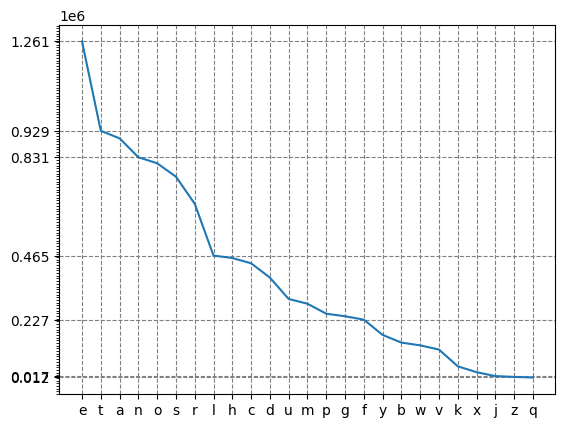

In [7]:
plot(letters_eng)

Индекс Ципфа для английского корпуса:

In [33]:
tsipf(letters_eng)

  индекс Ципфа   
┏━━━━━━┳━━━━━━━━┓
┃ ранг ┃ индекс ┃
┡━━━━━━╇━━━━━━━━┩
│    1 │    1.4 │
│    2 │    2.8 │
│    3 │    1.0 │
│    4 │    2.9 │
│    5 │    1.5 │
│    6 │    4.2 │
│    7 │    1.9 │
│    8 │    7.4 │
│    9 │    8.9 │
│   10 │    1.7 │
│   11 │    1.4 │
│   12 │    3.3 │
│   13 │    1.6 │
│   14 │    5.6 │
│   15 │    2.7 │
│   16 │    9.6 │
│   17 │    4.4 │
│   18 │    5.1 │
│   19 │   10.9 │
│   20 │    5.3 │
│   21 │   23.7 │
│   22 │   75.1 │
│   23 │   91.0 │
│   24 │   40.1 │
│   25 │  107.4 │
└──────┴────────┘

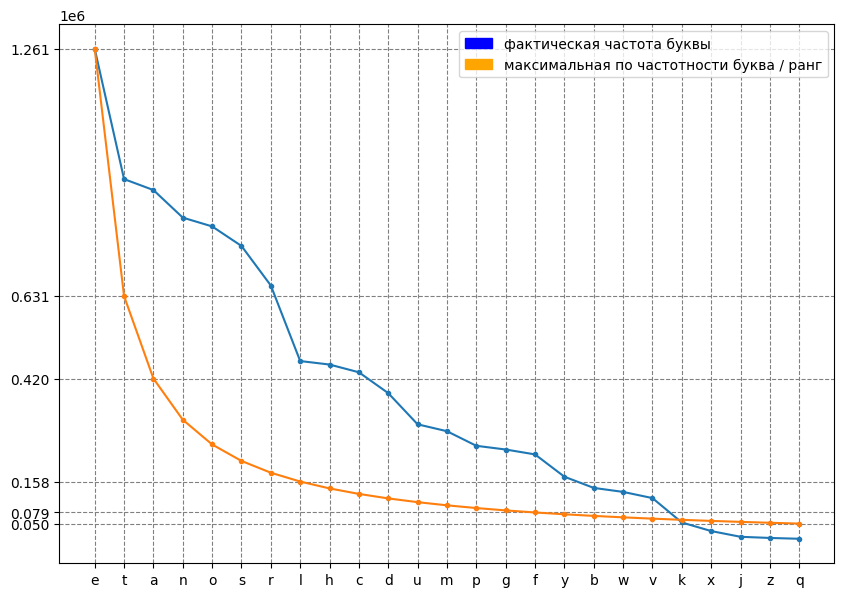

In [5]:
plot_ind(letters_eng)

Турецкий:

In [15]:
import wikipediaapi, time

texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='tr',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Dilbilim')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [16]:
texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Fizik')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [18]:
texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Biyoloji')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [4]:
texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Antik Yunanistan')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [6]:
texts_tur = open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Psikoloji')
for name in page_py.links.keys():
    texts_tur.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [7]:
import string, os, re
letters_tur = {}
letset_tur = set(['q', 'w', 'e', 'r', 't', 'y', 'u', 'ı', 'o', 'p', 'ğ', 'ü', 'i', 'ş', 'l', 'k', 'j', 'h', 'g', 'f', 'd', 's', 'a', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'ö', 'ç'])
wordcount_tur = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_tur.txt", 'r', encoding = 'utf-8') as f:
     text_tur = f.read()

words_tur = re.finditer(r'[qwertyuıopğüişlkjhgfdsazxcvbnmöç]+(?:-[qwertyuıopğüişlkjhgfdsazxcvbnmöç]+)?', text_tur, re.I)
for word in words_tur:
    if wordcount_tur >= 2e6:
        break
    else:
        wordcount_tur += 1
        for char in word.group():
            if char.lower() in letset_tur:
                if char.lower() in letters_tur:
                    letters_tur[char.lower()] +=1
                else:
                    letters_tur[char.lower()] = 1

print(wordcount_tur)

2000000


Таблица абсолютных частот букв в турецком корпусе:

In [50]:
let_freq(letters_tur)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     a │ 1462440 │
│     e │ 1246065 │
│     i │ 1208012 │
│     n │ 1003824 │
│     l │  988151 │
│     r │  975759 │
│     k │  559595 │
│     ı │  555150 │
│     d │  527704 │
│     t │  505168 │
│     m │  451928 │
│     s │  451478 │
│     o │  410492 │
│     u │  359025 │
│     y │  346618 │
│     b │  289463 │
│     ü │  209869 │
│     ş │  192636 │
│     g │  167852 │
│     v │  161096 │
│     z │  145826 │
│     h │  140830 │
│     c │  134337 │
│     p │  125980 │
│     ç │  120982 │
│     ğ │  118117 │
│     ö │   99869 │
│     f │   85716 │
│     j │   26293 │
│     w │   13603 │
│     x │    4058 │
│     q │    2258 │
└───────┴─────────┘

Таблица относительных частот букв в турецком корпусе:

In [51]:
let_freq_pers(letters_tur)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     a │                 11.17 │
│     e │                  9.52 │
│     i │                  9.23 │
│     n │                  7.67 │
│     l │                  7.55 │
│     r │                  7.45 │
│     k │                  4.27 │
│     ı │                  4.24 │
│     d │                  4.03 │
│     t │                  3.86 │
│     m │                  3.45 │
│     s │                  3.45 │
│     o │                  3.14 │
│     u │                  2.74 │
│     y │                  2.65 │
│     b │                  2.21 │
│     ü │                   1.6 │
│     ş │                  1.47 │
│     g │                  1.28 │
│     v │                  1.23 │
│     z │                  1.11 │
│     h │                  1.08 │
│     c │                  1.03 │
│     p │                  0.96 │
│     ç │                  0.92 │
│     ğ │                   0.9 │
│     ö │                  0.76 │
│     f │                  0.65 │
│     j │                   0.2 │
│     w │                   0.1 │
│     x │                  0.03 │
│     q │                  0.02 │
└───────┴───────────────────────┘

График частотности букв по турецкому корпусу (абсолютные частоты):

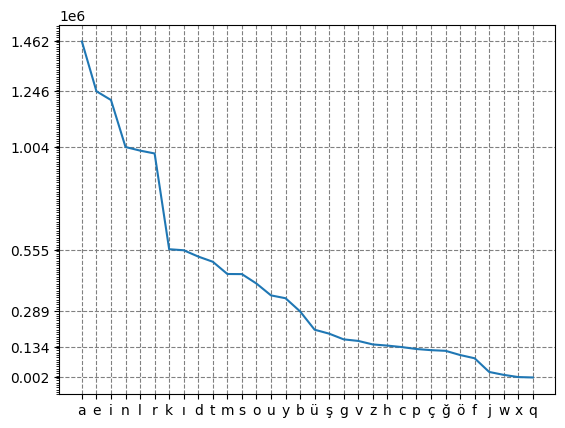

In [9]:
plot(letters_tur)

Индекс Ципфа для турецкого корпуса:

In [16]:
tsipf(letters_tur)

  индекс Ципфа   
┏━━━━━━┳━━━━━━━━┓
┃ ранг ┃ индекс ┃
┡━━━━━━╇━━━━━━━━┩
│    1 │    1.0 │
│    2 │    2.8 │
│    3 │    5.1 │
│    4 │    1.2 │
│    5 │    1.5 │
│    6 │    3.2 │
│    7 │    8.7 │
│    8 │   14.6 │
│    9 │    3.2 │
│   10 │    2.9 │
│   11 │    1.2 │
│   12 │    1.5 │
│   13 │    1.5 │
│   14 │    4.2 │
│   15 │    2.6 │
│   16 │    9.1 │
│   17 │    2.6 │
│   18 │   12.4 │
│   19 │   10.9 │
│   20 │    7.6 │
│   21 │    3.6 │
│   22 │    4.1 │
│   23 │   10.0 │
│   24 │    7.0 │
│   25 │   12.1 │
│   26 │  107.5 │
│   27 │   10.4 │
│   28 │   17.1 │
│   29 │   55.6 │
│   30 │  360.4 │
│   31 │   11.6 │
│   32 │  647.7 │
└──────┴────────┘

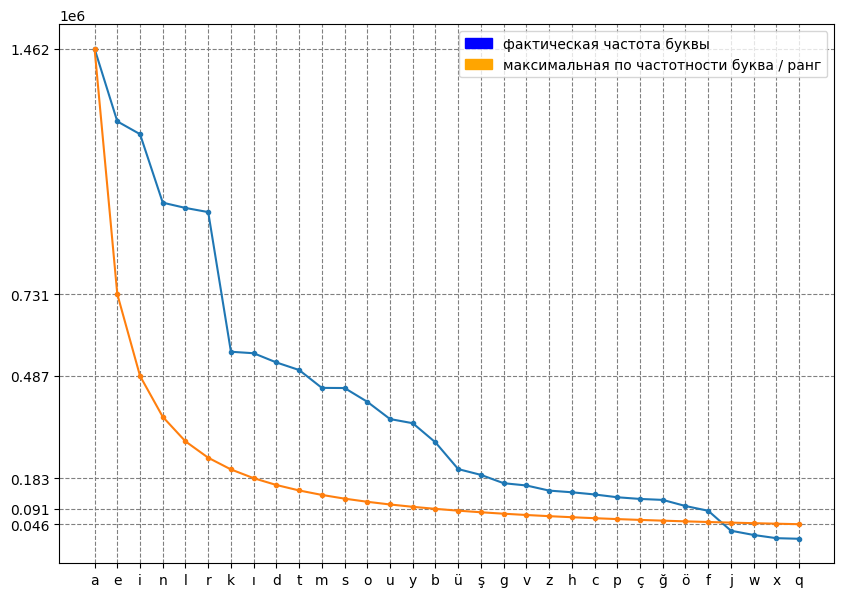

In [8]:
plot_ind(letters_tur)

Французский:

In [11]:
import wikipediaapi, time

texts_fr = open(r"C:\Users\lizao\Desktop\smth\shabat_fr.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='fr',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Linguistique')
for name in page_py.links.keys():
    texts_fr.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [13]:
page_py = wiki_wiki.page('Biologie')
for name in page_py.links.keys():
    texts_fr.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [15]:
page_py = wiki_wiki.page('Grèce antique')
for name in page_py.links.keys():
    texts_fr.write(wiki_wiki.page(name).text)
    time.sleep(2)

KeyboardInterrupt: 

In [9]:
letters_fr = {}
letset_fr = set(['a', 'à', 'â', 'æ', 'b', 'c', 'ç', 'd', 'e', 'é', 'è', 'ê', 'ë', 'f', 'g', 'h', 'i', 'î', 'ï', 'j', 'k', 'l', 'm', 'n', 'o', 'ô', 'œ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'û', 'ü', 'v', 'w', 'x', 'y', 'ÿ', 'z'])
wordcount_fr = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_fr.txt", 'r', encoding = 'utf-8') as f:
     text_fr = f.read()

words_fr = re.finditer(r'[AÀÂÆBCÇDEÉÈÊËFGHIÎÏJKLMNOÔŒPQRSTUÙÛÜVWXYŸZ]+(?:-[AÀÂÆBCÇDEÉÈÊËFGHIÎÏJKLMNOÔŒPQRSTUÙÛÜVWXYŸZ]+)?', text_fr, re.I)
for word in words_fr:
    if wordcount_fr == 2e6:
        break
    else:
        wordcount_fr += 1
        for char in word.group():
            if char.lower() in letset_fr:
                if char.lower() in letters_fr:
                    letters_fr[char.lower()] +=1
                else:
                    letters_fr[char.lower()] = 1

print(wordcount_fr)

2000000


Таблица абсолютных частот букв в французском корпусе:

In [60]:
let_freq(letters_fr)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     e │ 1472910 │
│     s │  835416 │
│     i │  787411 │
│     n │  765256 │
│     a │  742748 │
│     t │  721556 │
│     r │  660115 │
│     l │  601714 │
│     o │  581888 │
│     u │  533397 │
│     d │  413978 │
│     c │  368501 │
│     p │  310741 │
│     m │  287154 │
│     é │  268423 │
│     g │  135550 │
│     v │  118212 │
│     h │  111386 │
│     q │  105173 │
│     f │  103934 │
│     b │   92572 │
│     x │   50940 │
│     y │   44492 │
│     è │   43556 │
│     à │   36653 │
│     j │   22369 │
│     ê │   11687 │
│     k │   11403 │
│     z │    8741 │
│     w │    7225 │
│     ç │    5981 │
│     ô │    3491 │
│     î │    3233 │
│     â │    3037 │
│     ï │    1866 │
│     ù │    1866 │
│     œ │    1572 │
│     û │    1135 │
│     ü │     409 │
│     ë │     224 │
│     æ │      89 │
│     ÿ │       3 │
└───────┴─────────┘

Таблица относительных частот букв в французском корпусе:

In [61]:
let_freq_pers(letters_fr)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     e │                 14.33 │
│     s │                  8.13 │
│     i │                  7.66 │
│     n │                  7.45 │
│     a │                  7.23 │
│     t │                  7.02 │
│     r │                  6.42 │
│     l │                  5.85 │
│     o │                  5.66 │
│     u │                  5.19 │
│     d │                  4.03 │
│     c │                  3.59 │
│     p │                  3.02 │
│     m │                  2.79 │
│     é │                  2.61 │
│     g │                  1.32 │
│     v │                  1.15 │
│     h │                  1.08 │
│     q │                  1.02 │
│     f │                  1.01 │
│     b │                   0.9 │
│     x │                   0.5 │
│     y │                  0.43 │
│     è │                  0.42 │
│     à │                  0.36 │
│     j │                  0.22 │
│     k │                  0.11 │
│     ê │                  0.11 │
│     z │                  0.09 │
│     w │                  0.07 │
│     ç │                  0.06 │
│     ô │                  0.03 │
│     â │                  0.03 │
│     î │                  0.03 │
│     ï │                  0.02 │
│     ù │                  0.02 │
│     œ │                  0.02 │
│     û │                  0.01 │
│     ü │                   0.0 │
│     ë │                   0.0 │
│     æ │                   0.0 │
│     ÿ │                   0.0 │
└───────┴───────────────────────┘

График частотности букв по французскому корпусу (абсолютные частоты):

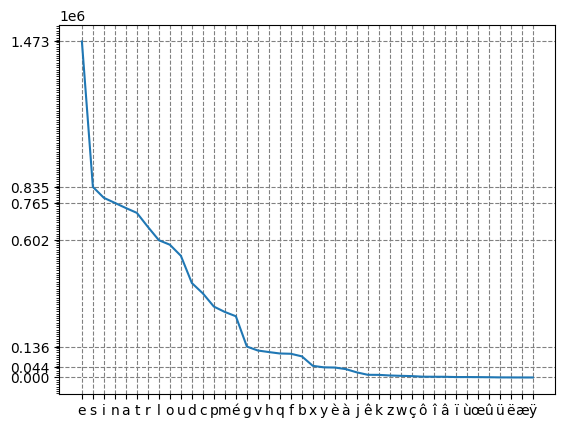

In [11]:
plot(letters_fr)

Индекс Ципфа для французского корпуса:

In [63]:
tsipf(letters_fr)

   индекс Ципфа    
┏━━━━━━┳━━━━━━━━━━┓
┃ ранг ┃   индекс ┃
┡━━━━━━╇━━━━━━━━━━┩
│    1 │      2.4 │
│    2 │      2.0 │
│    3 │      1.9 │
│    4 │      5.5 │
│    5 │      1.0 │
│    6 │      1.8 │
│    7 │      2.0 │
│    8 │      2.8 │
│    9 │      4.0 │
│   10 │      2.5 │
│   11 │      5.1 │
│   12 │     14.0 │
│   13 │      1.9 │
│   14 │      2.2 │
│   15 │      3.6 │
│   16 │     12.5 │
│   17 │      4.7 │
│   18 │     14.2 │
│   19 │     13.2 │
│   20 │     15.9 │
│   21 │    168.5 │
│   22 │     40.2 │
│   23 │    129.2 │
│   24 │     33.1 │
│   25 │     10.9 │
│   26 │    421.9 │
│   27 │     28.9 │
│   28 │     33.8 │
│   29 │    485.0 │
│   30 │     65.8 │
│   31 │   1297.7 │
│   32 │    789.3 │
│   33 │    455.6 │
│   34 │    126.0 │
│   35 │    246.3 │
│   36 │    203.9 │
│   37 │   3601.2 │
│   38 │    789.3 │
│   39 │   6575.5 │
│   40 │    937.0 │
│   41 │  16549.6 │
│   42 │ 490970.0 │
└──────┴──────────┘

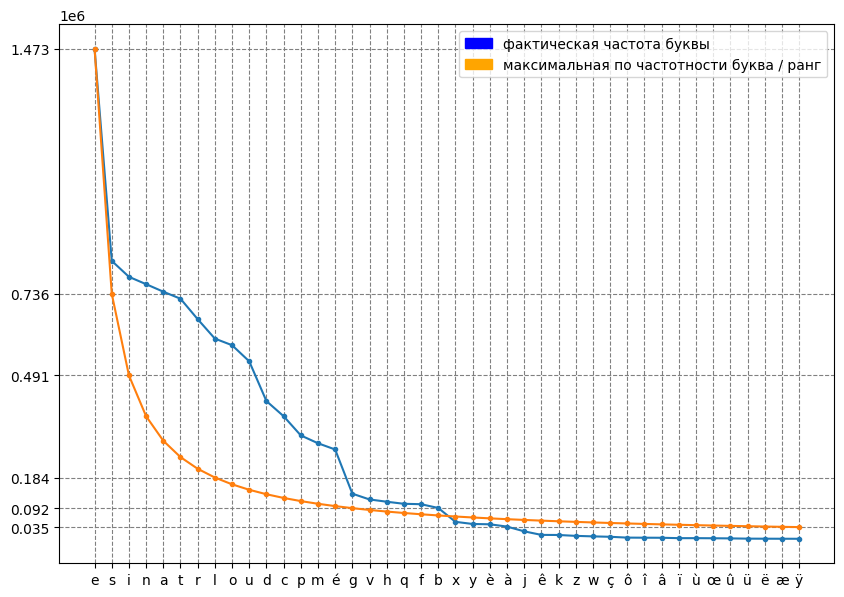

In [10]:
plot_ind(letters_fr)

Немецкий:

In [13]:
texts_de = open(r"C:\Users\lizao\Desktop\smth\shabat_ger.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='de',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Sprachwissenschaft')
for name in page_py.links.keys():
    texts_de.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [15]:
texts_de = open(r"C:\Users\lizao\Desktop\smth\shabat_ger.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Biologie')
for name in page_py.links.keys():
    texts_de.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [17]:
texts_de = open(r"C:\Users\lizao\Desktop\smth\shabat_ger.txt", 'a', encoding = 'utf-8')

page_py = wiki_wiki.page('Psychologie')
for name in page_py.links.keys():
    texts_de.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [11]:
import re
letters_de = {}
letset_de = set(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ä', 'ö', 'ü', 'ß'])
wordcount_de = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_ger.txt", 'r', encoding = 'utf-8') as f:
     text_de = f.read()


words_de = re.finditer(r'[ABCDEFGHIJKLMNOPQRSTUVWXYZÄÖÜẞ]+(?:-[ABCDEFGHIJKLMNOPQRSTUVWXYZÄÖÜẞ]+)?', text_de, re.I)
for word in words_de:
    if wordcount_de >= 2e6:
        break
    else:
        wordcount_de += 1
        for char in word.group():
            if char.lower() in letset_de:
                if char.lower() in letters_de:
                    letters_de[char.lower()] +=1
                else:
                    letters_de[char.lower()] = 1

print(wordcount_de)

2000000


Таблица абсолютных частот букв в немецком корпусе:

In [24]:
let_freq(letters_de)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     e │ 2072101 │
│     n │ 1283956 │
│     i │ 1111113 │
│     r │  946086 │
│     s │  883451 │
│     t │  811945 │
│     a │  713738 │
│     d │  615505 │
│     h │  574884 │
│     l │  510298 │
│     u │  509644 │
│     o │  443992 │
│     c │  395512 │
│     g │  393665 │
│     m │  328191 │
│     b │  261591 │
│     f │  215213 │
│     k │  203659 │
│     p │  175717 │
│     w │  174794 │
│     z │  154315 │
│     v │  132824 │
│     ä │   67667 │
│     ü │   61940 │
│     y │   49062 │
│     ö │   32845 │
│     j │   26905 │
│     x │   16599 │
│     ß │   13274 │
│     q │    4953 │
└───────┴─────────┘

Таблица относительных частот букв в немецком корпусе:

In [25]:
let_freq_pers(letters_de)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     e │                 15.72 │
│     n │                  9.74 │
│     i │                  8.43 │
│     r │                  7.18 │
│     s │                   6.7 │
│     t │                  6.16 │
│     a │                  5.41 │
│     d │                  4.67 │
│     h │                  4.36 │
│     l │                  3.87 │
│     u │                  3.87 │
│     o │                  3.37 │
│     c │                   3.0 │
│     g │                  2.99 │
│     m │                  2.49 │
│     b │                  1.98 │
│     f │                  1.63 │
│     k │                  1.54 │
│     p │                  1.33 │
│     w │                  1.33 │
│     z │                  1.17 │
│     v │                  1.01 │
│     ä │                  0.51 │
│     ü │                  0.47 │
│     y │                  0.37 │
│     ö │                  0.25 │
│     j │                   0.2 │
│     x │                  0.13 │
│     ß │                   0.1 │
│     q │                  0.04 │
└───────┴───────────────────────┘

График частотности букв по немецкому корпусу (абсолютные частоты):

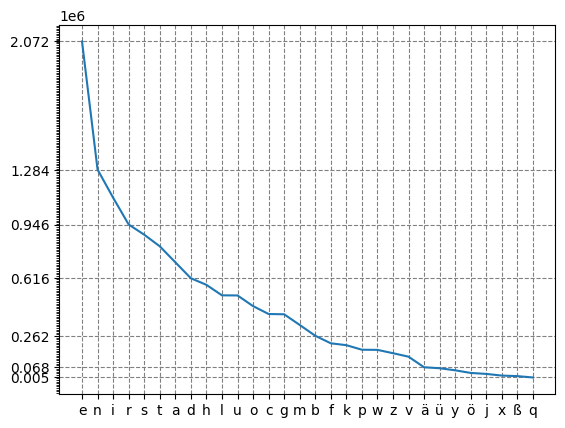

In [13]:
plot(letters_de)

Индекс Ципфа для немецкого корпуса:

In [27]:
tsipf(letters_de)

  индекс Ципфа   
┏━━━━━━┳━━━━━━━━┓
┃ ранг ┃ индекс ┃
┡━━━━━━╇━━━━━━━━┩
│    1 │    5.3 │
│    2 │    1.0 │
│    3 │    1.6 │
│    4 │    2.9 │
│    5 │    4.1 │
│    6 │    4.7 │
│    7 │    1.9 │
│    8 │   15.6 │
│    9 │    2.6 │
│   10 │    2.2 │
│   11 │    5.2 │
│   12 │    3.6 │
│   13 │    2.3 │
│   14 │    3.4 │
│   15 │    7.9 │
│   16 │   10.2 │
│   17 │    4.1 │
│   18 │    9.6 │
│   19 │    6.3 │
│   20 │   33.5 │
│   21 │   11.8 │
│   22 │   13.4 │
│   23 │   11.9 │
│   24 │   30.6 │
│   25 │  156.1 │
│   26 │  124.8 │
│   27 │   63.1 │
│   28 │   42.2 │
│   29 │   77.0 │
│   30 │  418.4 │
└──────┴────────┘

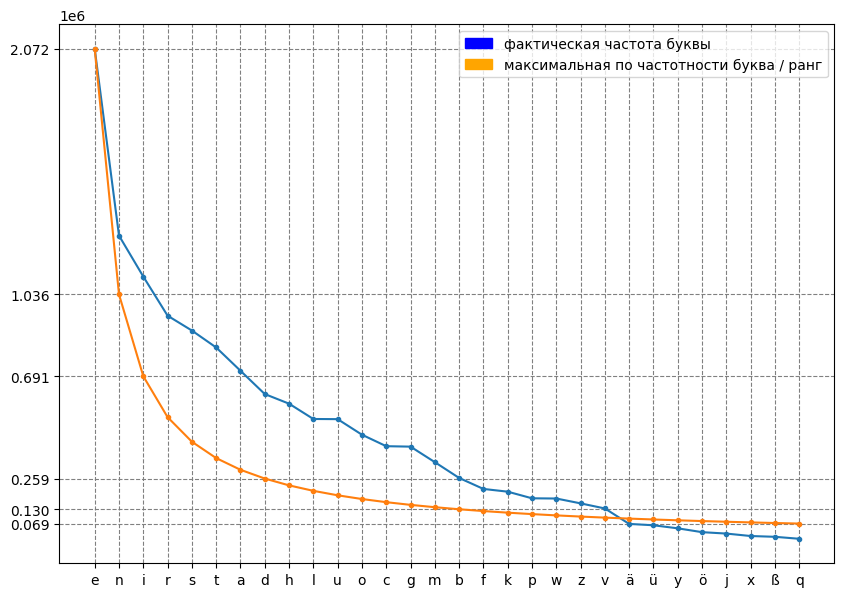

In [12]:
plot_ind(letters_de)

Итальянский:

In [5]:
import wikipediaapi, time

texts_it = open(r"C:\Users\lizao\Desktop\smth\shabat_it.txt", 'w', encoding = 'utf-8')

wiki_wiki = wikipediaapi.Wikipedia(
        language='it',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

page_py = wiki_wiki.page('Linguistica')
for name in page_py.links.keys():
    texts_it.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [9]:
page_py = wiki_wiki.page('Biologia')
for name in page_py.links.keys():
    texts_it.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [11]:
page_py = wiki_wiki.page('Psicologia')
for name in page_py.links.keys():
    texts_it.write(wiki_wiki.page(name).text)
    time.sleep(2)

In [13]:
import re
letters_it = {}
letset_it = set(['a', 'à', 'b', 'c', 'd', 'e', 'è', 'é', 'f', 'g', 'h', 'i', 'ì', 'í', 'l', 'm', 'n', 'o', 'ò', 'ó', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'v', 'z'])
wordcount_it = 0

with open(r"C:\Users\lizao\Desktop\smth\shabat_it.txt", 'r', encoding = 'utf-8') as f:
     text_it = f.read()

words_it = re.finditer(r'[AÀBCDEÈÉFGHIÌÍLMNOÒÓPQRSTUÙÚVZ]+(?:-[AÀBCDEÈÉFGHIÌÍLMNOÒÓPQRSTUÙÚVZ]+)?', text_it, re.I)
    
for word in words_it:
    if wordcount_it >= 2e6:
        break
    else:
        wordcount_it += 1
        for char in word.group():
            if char.lower() in letset_it:
                if char.lower() in letters_it:
                    letters_it[char.lower()] +=1
                else:
                    letters_it[char.lower()] = 1

print(wordcount_it)

2000000


Таблица абсолютных частот букв для итальянского корпуса:

In [13]:
let_freq(letters_it)

      корпус       
┏━━━━━━━┳━━━━━━━━━┓
┃ буква ┃ частота ┃
┡━━━━━━━╇━━━━━━━━━┩
│     i │ 1312787 │
│     e │ 1270640 │
│     a │ 1094810 │
│     o │  964482 │
│     n │  796373 │
│     l │  735355 │
│     t │  719277 │
│     r │  658340 │
│     s │  570369 │
│     c │  493975 │
│     d │  411329 │
│     u │  324552 │
│     m │  304206 │
│     p │  296253 │
│     g │  195951 │
│     v │  145474 │
│     f │  130910 │
│     z │  114147 │
│     h │  106503 │
│     b │   98311 │
│     q │   36529 │
│     à │   22689 │
│     è │   22089 │
│     ò │   10129 │
│     ù │    8611 │
│     é │    4929 │
│     ì │    3186 │
│     ó │     142 │
│     í │     131 │
│     ú │      17 │
└───────┴─────────┘

Табица относительных частот букв в итальянском корпусе:

In [14]:
let_freq_pers(letters_it)

         корпус проценты         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ буква ┃ частота (в процентах) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│     i │                  12.1 │
│     e │                 11.71 │
│     a │                 10.09 │
│     o │                  8.89 │
│     n │                  7.34 │
│     l │                  6.78 │
│     t │                  6.63 │
│     r │                  6.07 │
│     s │                  5.26 │
│     c │                  4.55 │
│     d │                  3.79 │
│     u │                  2.99 │
│     m │                   2.8 │
│     p │                  2.73 │
│     g │                  1.81 │
│     v │                  1.34 │
│     f │                  1.21 │
│     z │                  1.05 │
│     h │                  0.98 │
│     b │                  0.91 │
│     q │                  0.34 │
│     à │                  0.21 │
│     è │                   0.2 │
│     ò │                  0.09 │
│     ù │                  0.08 │
│     é │                  0.05 │
│     ì │                  0.03 │
│     í │                   0.0 │
│     ú │                   0.0 │
│     ó │                   0.0 │
└───────┴───────────────────────┘

График частотности букв по итальянскому корпусу (абсолютные частоты):

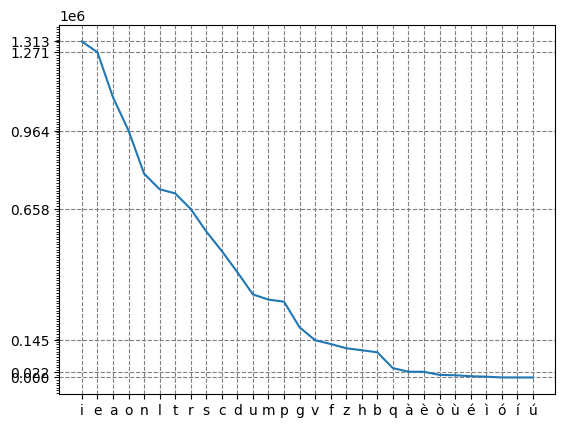

In [15]:
plot(letters_it)

Индекс Ципфа для итальянского корпуса:

In [16]:
tsipf(letters_it)

   индекс Ципфа   
┏━━━━━━┳━━━━━━━━━┓
┃ ранг ┃  индекс ┃
┡━━━━━━╇━━━━━━━━━┩
│    1 │     1.0 │
│    2 │     1.8 │
│    3 │     1.8 │
│    4 │     1.0 │
│    5 │     2.0 │
│    6 │     4.3 │
│    7 │     1.6 │
│    8 │     1.2 │
│    9 │     6.7 │
│   10 │     3.2 │
│   11 │     2.7 │
│   12 │     4.0 │
│   13 │     1.4 │
│   14 │     4.4 │
│   15 │     2.3 │
│   16 │    10.0 │
│   17 │    12.3 │
│   18 │    11.5 │
│   19 │    35.9 │
│   20 │     9.0 │
│   21 │    59.4 │
│   22 │    13.4 │
│   23 │   152.5 │
│   24 │   129.6 │
│   25 │    57.9 │
│   26 │   412.0 │
│   27 │   266.3 │
│   28 │ 10021.3 │
│   29 │ 77222.8 │
│   30 │  9245.0 │
└──────┴─────────┘

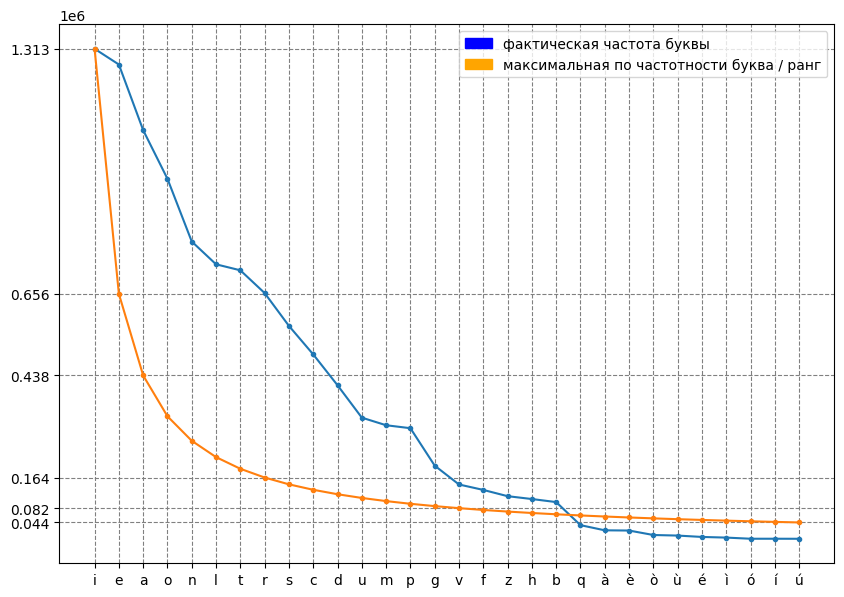

In [14]:
plot_ind(letters_it)

Сводная таблица для всех языков:

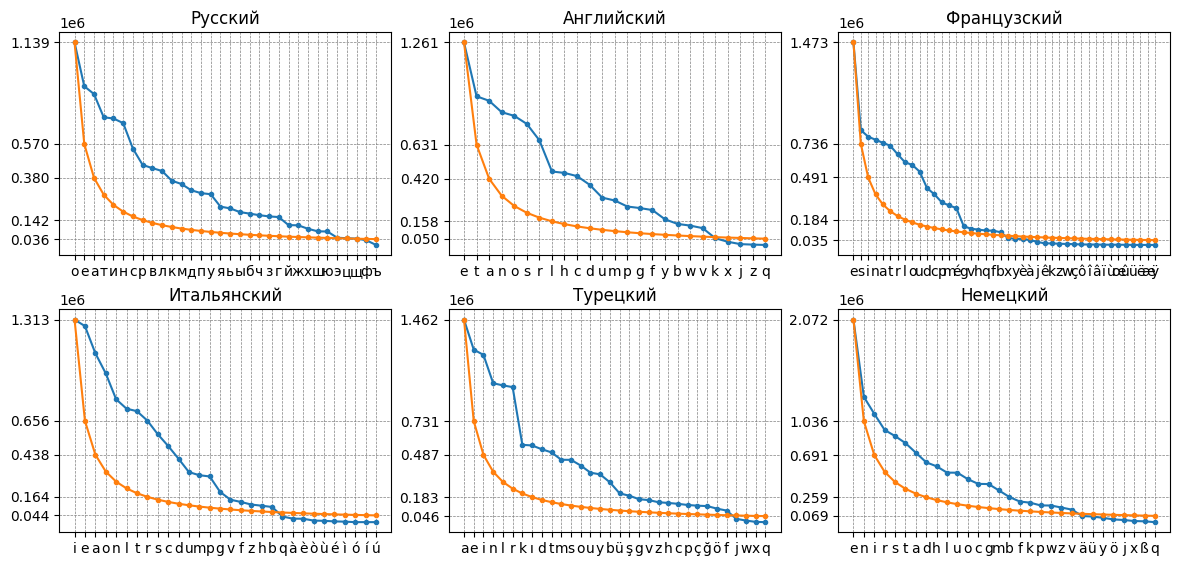

In [29]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(ncols=4, nrows=4)

ax_ru = fig.add_subplot(spec[0, 0])
ax_eng = fig.add_subplot(spec[0, 1])
ax_tur = fig.add_subplot(spec[1, 1])
ax_it = fig.add_subplot(spec[1, 0])
ax_fr = fig.add_subplot(spec[0, 2])
ax_de = fig.add_subplot(spec[1, 2])

ax_ru.set_title('Русский')
x_rus = [str(i) for i in letters.keys()]
y_rus = [i for i in letters.values()]
x_grid_rus = x_rus
y_grid_rus = [round(max([i for i in letters.values()]) / i, 1) for i in range(1, 33)]
ax_ru.plot(x_rus, y_rus, marker='o', markersize = 3)
ax_ru.plot(x_grid_rus, y_grid_rus, marker='o', markersize = 3)
ax_ru.set_yticks([y_grid_rus[0], y_grid_rus[1], y_grid_rus[2], y_grid_rus[7], y_grid_rus[len(y_grid_rus)-1]])
ax_ru.grid(True, color = "grey", linewidth = "0.5", linestyle = '--')

ax_eng.set_title('Английский')
letters_eng = {k: v for k, v in sorted(letters_eng.items(), key=lambda item: item[1], reverse=True)}
x_eng = [str(i) for i in letters_eng.keys()]
y_eng = [i for i in letters_eng.values()]
x_grid_eng = x_eng
y_grid_eng = [round(max([i for i in letters_eng.values()]) / i, 1) for i in range(1, len(letters_eng)+1)]
ax_eng.plot(x_eng, y_eng, marker='o', markersize = 3)
ax_eng.plot(x_grid_eng, y_grid_eng, marker='o', markersize = 3)
ax_eng.set_yticks([y_grid_eng[0], y_grid_eng[1], y_grid_eng[2], y_grid_eng[7], y_grid_eng[len(y_grid_eng)-1]])
ax_eng.grid(True, color = "grey", linewidth = "0.5", linestyle = '--')

ax_tur.set_title('Турецкий')
letters_tur = {k: v for k, v in sorted(letters_tur.items(), key=lambda item: item[1], reverse=True)}
x_tur = [str(i) for i in letters_tur.keys()]
y_tur = [i for i in letters_tur.values()]
x_grid_tur = x_tur
y_grid_tur = [round(max([i for i in letters_tur.values()]) / i, 1) for i in range(1, len(letters_tur)+1)]
ax_tur.plot(x_tur, y_tur, marker='o', markersize = 3)
ax_tur.plot(x_grid_tur, y_grid_tur, marker='o', markersize = 3)
ax_tur.set_yticks([y_grid_tur[0], y_grid_tur[1], y_grid_tur[2], y_grid_tur[7], y_grid_tur[len(y_grid_tur)-1]])
ax_tur.grid(True, color = "grey", linewidth = "0.5", linestyle = '--')

ax_de.set_title('Немецкий')
letters_de = {k: v for k, v in sorted(letters_de.items(), key=lambda item: item[1], reverse=True)}
x_de = [str(i) for i in letters_de.keys()]
y_de = [i for i in letters_de.values()]
x_grid_de = x_de
y_grid_de = [round(max([i for i in letters_de.values()]) / i, 1) for i in range(1, len(letters_de)+1)]
ax_de.plot(x_de, y_de, marker='o', markersize = 3)
ax_de.plot(x_grid_de, y_grid_de, marker='o', markersize = 3)
ax_de.set_yticks([y_grid_de[0], y_grid_de[1], y_grid_de[2], y_grid_de[7], y_grid_de[len(y_grid_de)-1]])
ax_de.grid(True, color = "grey", linewidth = "0.5", linestyle = '--')

ax_fr.set_title('Французский')
letters_fr = {k: v for k, v in sorted(letters_fr.items(), key=lambda item: item[1], reverse=True)}
x_fr = [str(i) for i in letters_fr.keys()]
y_fr = [i for i in letters_fr.values()]
x_grid_fr = x_fr
y_grid_fr = [round(max([i for i in letters_fr.values()]) / i, 1) for i in range(1, len(letters_fr)+1)]
ax_fr.plot(x_fr, y_fr, marker='o', markersize = 3)
ax_fr.plot(x_grid_fr, y_grid_fr, marker='o', markersize = 3)
ax_fr.set_yticks([y_grid_fr[0], y_grid_fr[1], y_grid_fr[2], y_grid_fr[7], y_grid_fr[len(y_grid_fr)-1]])
ax_fr.grid(True, color = "grey", linewidth = "0.5", linestyle = '--')

ax_it.set_title('Итальянский')
letters_it = {k: v for k, v in sorted(letters_it.items(), key=lambda item: item[1], reverse=True)}
x_it = [str(i) for i in letters_it.keys()]
y_it = [i for i in letters_it.values()]
x_grid_it = x_it
y_grid_it = [round(max([i for i in letters_it.values()]) / i, 1) for i in range(1, len(letters_it)+1)]
ax_it.plot(x_it, y_it, marker='o', markersize = 3)
ax_it.plot(x_grid_it, y_grid_it, marker='o', markersize = 3)
ax_it.set_yticks([y_grid_it[0], y_grid_it[1], y_grid_it[2], y_grid_it[7], y_grid_it[len(y_grid_it)-1]])
ax_it.grid(True, color = "grey", linewidth = "0.5", linestyle = '--')

fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()